Для корректной работы ноутбука нужна версия питона 3.8+ и необходимо прописать путь к таблице с данными по коронавирусу. Везде в работе используется 1% уровень значимости и в дальнейшем не указывается.

 # Сгенерированные данные

In [193]:
import random 
import statistics 
import numpy as np
import pandas as pd
from scipy.stats import moment, skew, kurtosis
from scipy import stats
import matplotlib.pyplot as plt
import pylab 

In [108]:
# Кол-во сгенерированных чисел 
t = 500
# Показатель бетта для показательного (экспоненциального)
beta = 2
# Показатель формы для гамма распределения 
shape = 3
# Кол-во степеней свободы для распределения стьюдента
df = 10
# Параметр для распределения Бернулли и для геометрического распределения
p = 0.5
# Показатель лямбда для распределения Пуассона
lam = 5

In [109]:
uniform = np.random.uniform(low=0, high=1, size=t)

normal = np.random.normal(loc=0, scale=1, size=t)

exponential = np.random.exponential(scale=beta, size=t)

gamma = np.random.gamma(shape=shape, scale=1, size=t)

student = np.random.standard_t(df=df, size=t)

bernouli = np.random.binomial(n=1, p=p, size=t)

poisson = np.random.poisson(lam=lam, size=t)

geometric = np.random.geometric(p=p, size=t)

In [115]:
dist_names = ['Равномерное', 
        'Нормальное', 
        'Показательное', 
        'Гамма', 
        'Стьюдента', 
        'Бернулли', 
        'Пуассона', 
        'Геометрическое']

distributions = [uniform, 
                 normal, 
                 exponential, 
                 gamma, 
                 student, 
                 bernouli, 
                 poisson, 
                 geometric]
metric_names = [
    'Выборочная средняя', 
    'Дисперсия',
    'Медиана', 
    'Мода', 
    'Ассиметрия (skewness)',
    'Эксцесс (kurtosis)',
    'Первый центральный момент',
    'Второй центральный момент'
]

In [116]:
def characteristics(data, Print=False):
    
    df_1 = []
    mean = round(data.mean(), 5)
    var = round(np.var(data), 5)
    median = round(np.median(data), 5)
    mode = round(statistics.mode(data), 5)
    skewness = round(skew(data), 5)
    kurt = round(kurtosis(data), 5)
    mom_1 = round(moment(data, moment=1), 5)
    mom_2 = round(moment(data, moment=2), 5)
    
    df_1.append([mean, 
                var, 
                median, 
                mode, 
                skewness, 
                kurt, 
                mom_1, 
                mom_2])
    
    if Print:
        print('Выборочная средняя:', round(data.mean(), 5))
        print('Дисперсия:', round(np.var(data), 5))
        print('Медиана:', round(np.median(data), 5))
        print('Мода:', round(statistics.mode(data), 5))
        print('Ассиметрия (skewness):', round(skew(data), 5))
        print('Эксцесс (kurtosis):', round(kurtosis(data), 5))
        print('Первый центральный момент:', round(moment(data, moment=1), 5))
        print('Второй центральный момент:', round(moment(data, moment=2), 5))
        
    else:
        return df_1[0]
    

In [117]:
df = []
for dist in distributions:
    dist_list = characteristics(dist)
    for value in dist_list:
        df.append(value)  

In [118]:
total = pd.DataFrame(np.array(df).reshape(8, 8))
total = total.rename(
    index=dict(zip([i for i in range(0, len(dist_names))], dist_names)), 
    columns=(dict(zip([i for i in range(0, len(metric_names))], metric_names)))).T
display(total)

,Равномерное,Нормальное,Показательное,Гамма,Стьюдента,Бернулли,Пуассона,Геометрическое
Выборочная средняя,0.49970,0.01452,2.07681,2.99325,-0.03378,0.49800,5.06400,1.99400
Дисперсия,0.08942,1.11592,4.15991,2.82580,1.28492,0.25000,5.15990,1.96596
Медиана,0.49964,0.04725,1.42946,2.68903,-0.02860,0.00000,5.00000,1.00000
Мода,0.52082,-0.15941,0.23194,2.97927,0.18948,0.00000,4.00000,1.00000
Ассиметрия (skewness),-0.01817,-0.25128,1.96147,0.95694,-0.01744,0.00800,0.46148,1.95658
Эксцесс (kurtosis),-1.26437,0.36812,5.56201,0.62490,1.15242,-1.99994,0.44901,4.67682
Первый центральный момент,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Второй центральный момент,0.08942,1.11592,4.15991,2.82580,1.28492,0.25000,5.15990,1.96596


In [119]:

# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution

def pvalue_normal_dist(data: list, data_names: list) -> dict:
    dict_pvalues = {}
    for index, distribution in enumerate(data):
        st = stats.shapiro(distribution)
        dict_pvalues[data_names[index]] = st.pvalue
    return dict_pvalues

def check(pvalues: dict, alpha = 0.01) -> dict:
    dict_check_normal = {}
    for key, value in pvalues.items():
        if value >= alpha:
            normal_bool = True
        else:
            normal_bool = False
        dict_check_normal[key] = normal_bool
    return dict_check_normal

normal_dist_pvalues = pvalue_normal_dist(distributions, dist_names)
normal_check = check(
    pvalues = normal_dist_pvalues,
    alpha=0.01
)

normal_dist_pvalues = pd.Series(normal_dist_pvalues).to_frame(name='normal_pvalues').transpose()
normal_check = pd.Series(normal_check).to_frame(name='normal_dist_alpha_0.01').transpose()
total = pd.concat([total, normal_dist_pvalues, normal_check])

In [120]:
# Исследование распределения на нормальность
# Тест Колмогорова

def pvalue_normal_dist_colm(data: list, data_names: list) -> dict:
    dict_pvalues = {}
    for index, distribution in enumerate(data):
        st = stats.kstest(distribution,'norm')
        dict_pvalues[data_names[index]] = st.pvalue
    return dict_pvalues

normal_dist_colm_pvalues = pvalue_normal_dist_colm(distributions, dist_names)
normal_check_colm = check(
    pvalues = normal_dist_colm_pvalues,
    alpha=0.01
)

normal_dist_colm_pvalues = pd.Series(normal_dist_colm_pvalues).to_frame(name='normal_colm_pvalues').transpose()
normal_check_colm = pd.Series(normal_check_colm).to_frame(name='normal_dist_colm_alpha_0.01').transpose()
total = pd.concat([total, normal_dist_colm_pvalues, normal_check_colm])

In [121]:
# The two-sample Kolmogorov-Smirnov
#The null hypothesis is that the two distributions are identical, the alternative is that they are not identical
def pvalue_uniformity_with_normal(data: list, data_names: list) -> dict:
    dict_pvalues = {}
    for index, distribution in enumerate(data):
        st = stats.ks_2samp(distribution, data[1])
        dict_pvalues[data_names[index]] = st.pvalue
    return dict_pvalues

uniformity_pvalue = pvalue_uniformity_with_normal(distributions, dist_names)
uniformity_check = check(
    pvalues = uniformity_pvalue,
    alpha=0.01
)

uniformity_pvalue = pd.Series(uniformity_pvalue).to_frame(name='uniformity_with_normal_pvalues').transpose()
uniformity_check = pd.Series(uniformity_check).to_frame(name='uniformity_with_normal_alpha_0.01').transpose()

total = pd.concat([total, uniformity_pvalue, uniformity_check])

In [122]:
# The chi-square test tests the null hypothesis that the categorical data has the given frequencies.
# привожу пример теста Хи квадрат для проверки, что
# одинакова ли частота попадания в интервал >= 0 и интервал < 0
# сравнивать буду с нормальным сгенерированным распределением.

def pvalue_hi2_with_normal(data: list, data_names: list) -> dict:
    dict_pvalues = {}
    for index, distribution in enumerate(data):
        st = stats.chisquare(
            f_obs=[
                len([x for x in distribution if x < 0]),
                len([x for x in distribution if x >= 0])
            ],
            f_exp=[
                len([x for x in data[1] if x < 0]),
                len([x for x in data[1] if x >= 0])
            ],
        )                
        dict_pvalues[data_names[index]] = st.pvalue
    return dict_pvalues

hi2_pvalue = pvalue_hi2_with_normal(distributions, dist_names)
hi2_check = check(
    pvalues = hi2_pvalue,
    alpha=0.01
)

hi2_pvalue = pd.Series(hi2_pvalue).to_frame(name='hi2_with_normal_pvalues').transpose()
hi2_check = pd.Series(hi2_check).to_frame(name='hi2_with_normal_alpha_0.01').transpose()

total = pd.concat([total, hi2_pvalue, hi2_check])

In [123]:
# the Mann–Whitney U test is a nonparametric test of the null hypothesis that,
# for randomly selected values X and Y from two populations,
# the probability of X being greater than Y is equal to the probability of Y being greater than X.
# Сравниваю все распределения с нормальным

def pvalue_mean_eqaul_with_normal(data: list, data_names: list) -> dict:
    dict_pvalues = {}
    for index, distribution in enumerate(data):
        st = stats.mannwhitneyu(distribution, data[1])
        dict_pvalues[data_names[index]] = st.pvalue
    return dict_pvalues

mean_eqaul_pvalue = pvalue_mean_eqaul_with_normal(distributions, dist_names)
mean_eqaul_check = check(
    pvalues = mean_eqaul_pvalue,
    alpha=0.01
)

mean_eqaul_pvalue = pd.Series(mean_eqaul_pvalue).to_frame(name='mean_eqaul_with_normal_pvalues').transpose()
mean_eqaul_check = pd.Series(mean_eqaul_check).to_frame(name='mean_eqaul_with_normal_alpha_0.01').transpose()

total = pd.concat([total, mean_eqaul_pvalue, mean_eqaul_check])

In [124]:
total.transpose()[['normal_pvalues',
       'normal_dist_alpha_0.01', 'normal_colm_pvalues',
       'normal_dist_colm_alpha_0.01', 'uniformity_with_normal_pvalues',
       'uniformity_with_normal_alpha_0.01', 'hi2_with_normal_pvalues',
       'hi2_with_normal_alpha_0.01', 'mean_eqaul_with_normal_pvalues',
       'mean_eqaul_with_normal_alpha_0.01']].astype(
    {'normal_dist_alpha_0.01': 'bool',
     'normal_dist_colm_alpha_0.01': 'bool',
     'uniformity_with_normal_alpha_0.01': 'bool',
     'hi2_with_normal_alpha_0.01': 'bool',
     'mean_eqaul_with_normal_alpha_0.01': 'bool',
    })

,normal_pvalues,normal_dist_alpha_0.01,normal_colm_pvalues,normal_dist_colm_alpha_0.01,uniformity_with_normal_pvalues,uniformity_with_normal_alpha_0.01,hi2_with_normal_pvalues,hi2_with_normal_alpha_0.01,mean_eqaul_with_normal_pvalues,mean_eqaul_with_normal_alpha_0.01
Равномерное,1.871929e-12,False,1.983135e-116,False,1.955989e-53,False,5.309620e-104,False,3.069670e-20,False
Нормальное,4.512694e-02,True,6.921771e-01,True,1.000000e+00,True,1.000000e+00,True,4.999563e-01,True
Показательное,2.480319e-23,False,3.012651e-119,False,3.933574e-58,False,5.309620e-104,False,1.274418e-81,False
Гамма,6.016037e-14,False,3.379867e-316,False,1.190576e-143,False,5.309620e-104,False,2.160765e-140,False
Стьюдента,9.389844e-04,False,5.163249e-01,True,8.636767e-01,True,3.708483e-01,True,2.171465e-01,True
Бернулли,3.549133e-31,False,4.113280e-116,False,1.955989e-53,False,5.309620e-104,False,2.848267e-18,False
Пуассона,1.552798e-08,False,0.000000e+00,False,4.996712e-238,False,5.309620e-104,False,6.593891e-157,False
Геометрическое,7.992740e-28,False,0.000000e+00,False,7.083969e-174,False,5.309620e-104,False,3.886067e-112,False


- Тест Шапиро-Уилка, нормально распределено только нормальное сгенерированное распределение на aplha=0.01.
- Критерий Колмогорова, нормально распределено только нормальное сгенерированное распределение на aplha=0.01.
- Критерий Колмогорова-Смирнова, однородность с нормальным сгенерированным распределение наблюдается у распределения Стьюдента на aplha=0.01.
- Критерий Хи^2 показал, что гипотеза о равенстве частоты положительных и отрицательных значений по сравнению с нормальным распределением равно распределению Стьюдента на aplha=0.01.
- Непараметрический тест Манни-Уитни показал равенство среднего по сравнению с нормальным распределение у распределения Стьюдента.

# Данные по короновирусу

In [126]:
# change your path!
df=pd.read_excel('/your_path/Tablitsa_2021-09-28_03-24.xlsx',index_col=0)

In [212]:
df.describe()

,Заражений,Выздоровлений,Смертей,Смертей за день,Заражений за день,Выздоровлений за день
count,4.800800e+04,4.800800e+04,48008.000000,48008.000000,48008.000000,48008.000000
mean,3.519369e+04,3.069263e+04,787.563302,4.263435,155.039764,137.854462
std,1.037055e+05,9.226223e+04,2110.420664,9.166762,428.168630,402.234873
min,0.000000e+00,0.000000e+00,0.000000,0.000000,-1.000000,0.000000
25%,4.333000e+03,3.028000e+03,37.000000,0.000000,33.000000,18.000000
50%,1.646600e+04,1.398450e+04,214.000000,1.000000,79.000000,61.000000
75%,3.775150e+04,3.445675e+04,728.000000,5.000000,159.000000,136.000000
max,1.624377e+06,1.483976e+06,28790.000000,124.000000,9120.000000,8033.000000


In [127]:
df.index =pd.to_datetime(df.index)
df.sort_values(by=['Регион','Дата'],inplace=True,ascending=[1,1])

In [128]:
example = df[df['Регион'] == 'Адыгея']
example.sort_values(by=['Дата'],ascending=[1])

In [186]:
real=list(example['Заражений за день'])
real=[np.asarray(real)]

Проверим нормальнойсть реальных данных с помощью теста Шапиро-Уилка и Колмогорова-Смирнова

In [187]:
names=['Заражений за день в Адыгее']

In [190]:
normal_dist_pvalues = pvalue_normal_dist(real, names)
normal_check = check(
    pvalues = normal_dist_pvalues,
    alpha=0.01
)
total_real=pd.DataFrame()
normal_dist_pvalues = pd.Series(normal_dist_pvalues).to_frame(name='normal_pvalues').transpose()
normal_check = pd.Series(normal_check).to_frame(name='normal_dist_alpha_0.01').transpose()
total_real = pd.concat([total_real, normal_dist_pvalues, normal_check])


normal_dist_colm_pvalues = pvalue_normal_dist_colm(real, names)
normal_check_colm = check(
    pvalues = normal_dist_colm_pvalues,
    alpha=0.01
)
normal_dist_colm_pvalues = pd.Series(normal_dist_colm_pvalues).to_frame(name='normal_colm_pvalues').transpose()
normal_check_colm = pd.Series(normal_check_colm).to_frame(name='normal_dist_colm_alpha_0.01').transpose()
total = pd.concat([total_real, normal_dist_colm_pvalues, normal_check_colm])


In [191]:
total

,Заражений за день в Адыгее
normal_pvalues,5.741370e-17
normal_dist_alpha_0.01,0.000000e+00
normal_colm_pvalues,0.000000e+00
normal_dist_colm_alpha_0.01,0.000000e+00


Нулевая гипотеза отклоняется, распределение нельзя считать нормальным на 1% уровне значимости

In [195]:
real=pd.DataFrame(example['Заражений за день'])

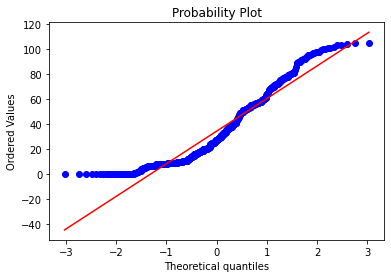

In [200]:
stats.probplot(real['Заражений за день'], dist="norm", plot=pylab)
pylab.show()

Q-Q plot это ясно визуализирует. Имеется тяжелый левый хвост

<AxesSubplot:>

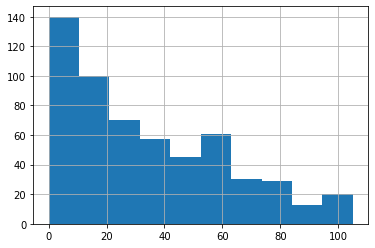

In [202]:
example['Заражений за день'].hist()

Проведем проверку на стационарность с помощью теста Дики-Фуллера.

In [203]:
import statsmodels.api as sm
test = sm.tsa.adfuller(example['Заражений за день'])
print ('adf: ', test[0])
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -3.8965209072328375
p-value:  0.0020606010292067464
Critical values:  {'1%': -3.4421660928041633, '5%': -2.8667523104859627, '10%': -2.56954599309042}
единичных корней нет, ряд стационарен


In [208]:
example_2 = df[df['Регион'] == 'Нижегородская обл.']
example_2.sort_values(by=['Дата'],ascending=[1])
real_2=pd.DataFrame(example_2['Заражений за день'])

Так как распределение не является нормальным, в дальнейшем для проверки равенства дисперсий будем использовать тест Левена, который менее чувствителен к отклонению распределения от нормального. С помощью теста Левена сравним равенство дисперсий распределений заражений за день в Адыгее и Нижегородской области.

In [209]:
import numpy as np
from scipy.stats import levene
alpha = 0.01

def levene_test(df1, df2, p_value = alpha):
    st = levene(df1, df2)
    print('Variances of distributions is {}equal\n'.format( {True:'not ',False:''}[st[1] < p_value]))
    
levene_test(real['Заражений за день'], real_2['Заражений за день'])

Variances of distributions is not equal



По критерию Левена на 1% уровне значимости дисперсии двух выборок нельзя признать равными

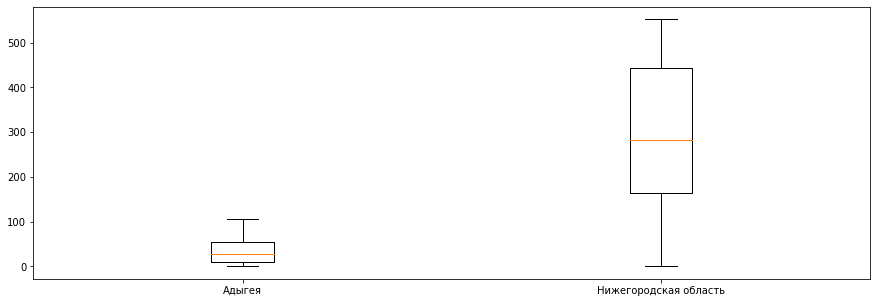

In [211]:
plt.figure(figsize=(15,5))
plt.boxplot([real['Заражений за день'], real_2['Заражений за день']])
x = np.arange(1,3)
plt.xticks(x, ('Адыгея', 'Нижегородская область'))
plt.show()

Среднее число заражений за день в России 155. Равно ли оно среднему в Нижегородской области.

In [214]:
stats.ttest_1samp(real_2['Заражений за день'], 155)

Ttest_1sampResult(statistic=21.594003449495037, pvalue=7.982898358986297e-76)

Мы видим, что нулевая гипотеза о равенстве среднего по России среднему в Нижегородской области отклонена

In [219]:
from scipy.stats import spearmanr
corr, p = spearmanr(real['Заражений за день'], real_2['Заражений за день'])
print(p)

2.8362714368256813e-103


Из теста на корреляцию Спирмена мы отклоняем нулевую гипотезу, что распределения независимы. Проверим значимо ли они отличаются с помощью парного t критерия

In [220]:
from scipy.stats import ttest_rel
stat, p = ttest_rel(real['Заражений за день'], real_2['Заражений за день'])
print(p)

7.560973764365307e-190


нулевая гипотеза, что выборки статистически не отличаются отклонена